In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
## Import essential libraries
import pandas as pd
import numpy as np
import cv2
#from google.colab.patches import cv2_imshow
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors
plt.style.use('seaborn-whitegrid')
%matplotlib inline

from PIL import Image
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy.special import softmax

C:\Users\ATISHAY SG\AppData\Local\Temp\ipykernel_5436\488137263.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks/MAHE/Research/MAHE Staff Student Research Codes/Ravindra'
    DATA_DIR = DIR+'/Data/'
else:
    DATA_DIR = 'Data/'

In [12]:
## Read ECG image
FILE = 'Image_43.tif'
img = cv2.imread(DATA_DIR + FILE)
cv2.imshow(img)

error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


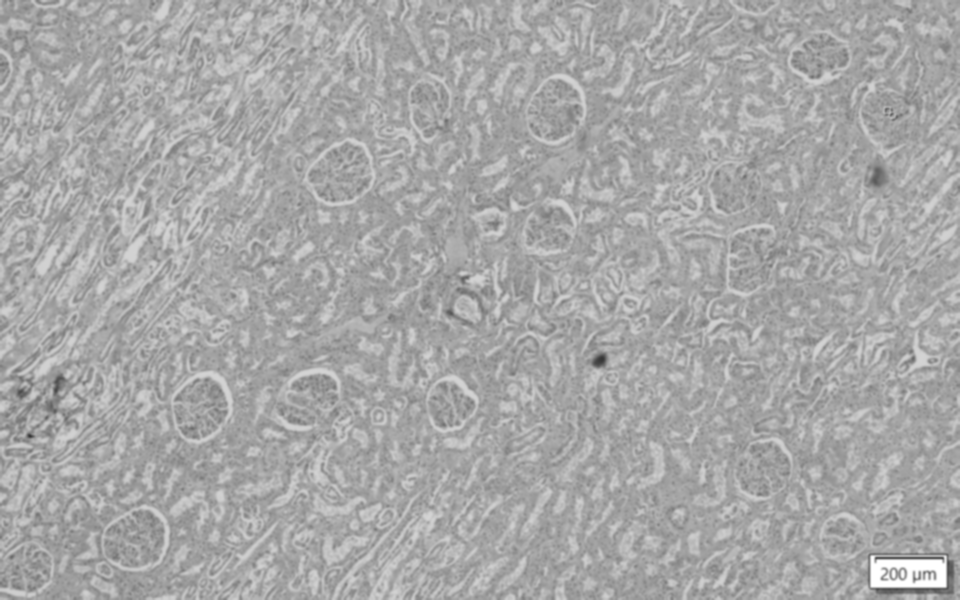

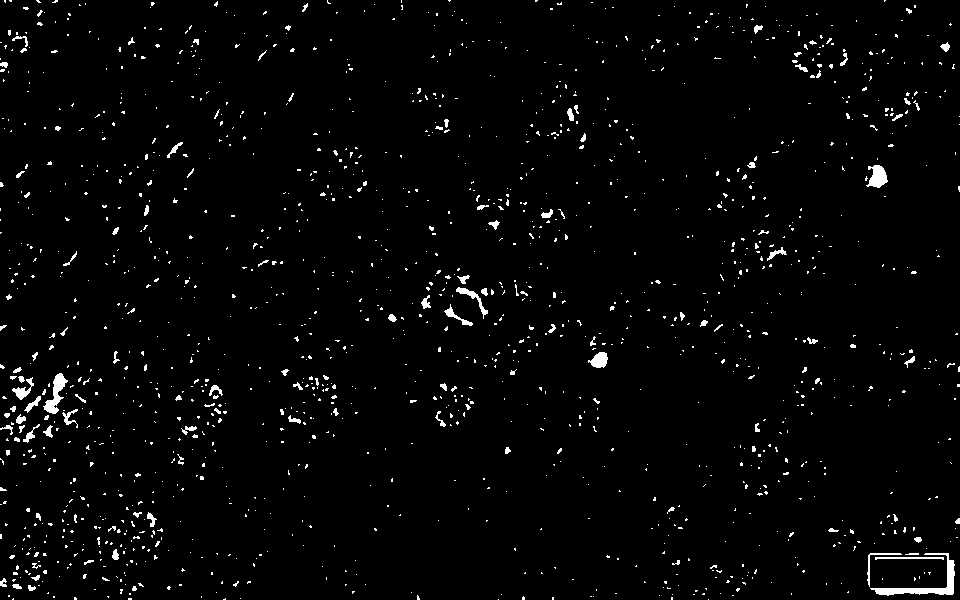

In [ ]:
## Image transformation

# Convert image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Smoothen image
img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
cv2_imshow(img_gray)

# Set all pixels above "cutoff" to 255, and remaining pixels to 0
cutoff = 140
#img_thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 91, 2)
img_thresh = cv2.threshold(img_gray, cutoff, 255, cv2.THRESH_BINARY)[1]

# Reverse polarity for clarity
img_thresh = 255 - img_thresh
cv2_imshow(img_thresh)